In [1]:
#importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# reading dataset
df=pd.read_csv('advertising.csv')

In [3]:
#Getting insight of dataset
print(df.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [4]:
print(df.dtypes)

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### By using info we got the idea that all four columns have floar as a datatype which is apt as per our requirement and also there are no null values Hence no data cleaning

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


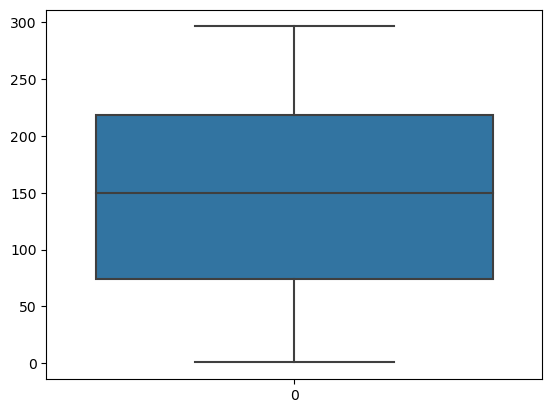

In [7]:
# Checking for outlier
sns.boxplot(df['TV'])
plt.show()

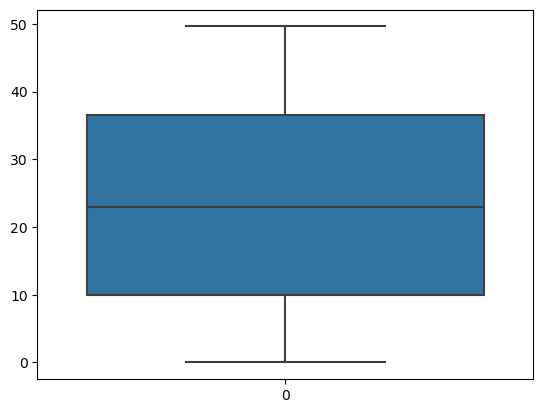

In [8]:
sns.boxplot(df['Radio'])
plt.show()

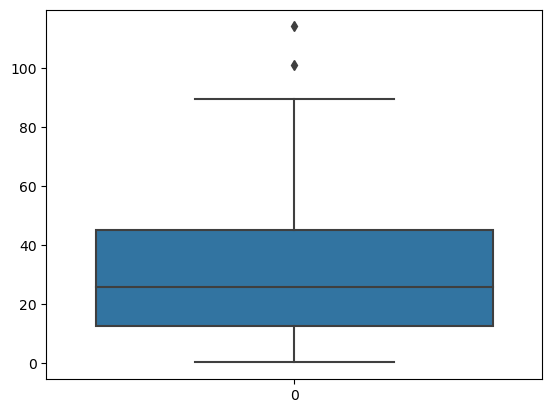

In [9]:
sns.boxplot(df['Newspaper'])
plt.show()

### No considerable outliers noticed

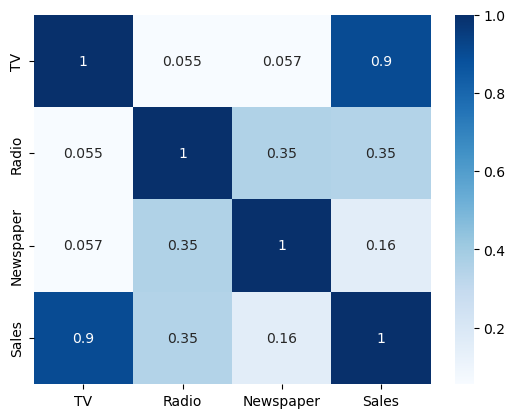

In [10]:
# Checking correlation between variables
corr=df.corr()
sns.heatmap(corr,cmap='Blues',annot=True)
plt.show()

#### Correlation value lies between -1 to 1. Closer the value to one indicated strong relationship between variables. Here strong relation is observed between Sales and TV as value is 0.9 which is very close to 1. The value 0.9 indicated strong positive correlation.

In [11]:
# Building Model
X=df['TV']
y=df['Sales']

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [13]:
import statsmodels.api as sm
#to add intercept
X_train_sm=sm.add_constant(X_train)

In [14]:
lr=sm.OLS(y_train,X_train_sm).fit()

In [15]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     540.0
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           1.51e-49
Time:                        14:34:13   Log-Likelihood:                -307.76
No. Observations:                 140   AIC:                             619.5
Df Residuals:                     138   BIC:                             625.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1506      0.382     18.699      0.0

#### The above summary tells us about key statistics like R-squared which are required for Linear Regression

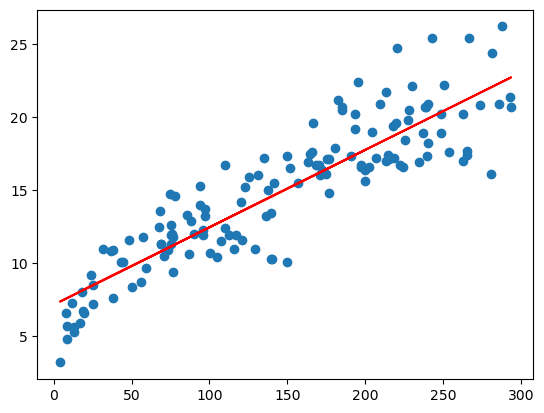

In [16]:
plt.scatter(X_train,y_train)
plt.plot(X_train,7.150+0.053*X_train,'r')
plt.show()

In [17]:
y_train_pred=lr.predict(X_train_sm)
residuals=(y_train,y_train_pred)

C:\Users\msi1\AppData\Local\Temp\ipykernel_10084\3097676044.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,bins=20)


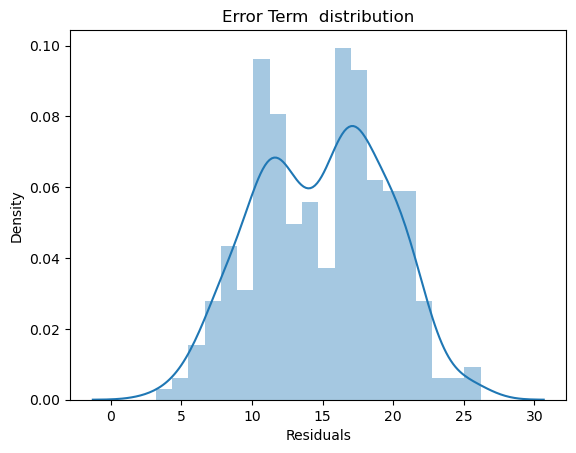

In [18]:
sns.distplot(residuals,bins=20)
plt.title('Error Term  distribution')
plt.xlabel('Residuals')
plt.show()

In [19]:
# Now we will predict using X_test
X_test_sm=sm.add_constant(X_test)
y_pred=lr.predict(X_test_sm)

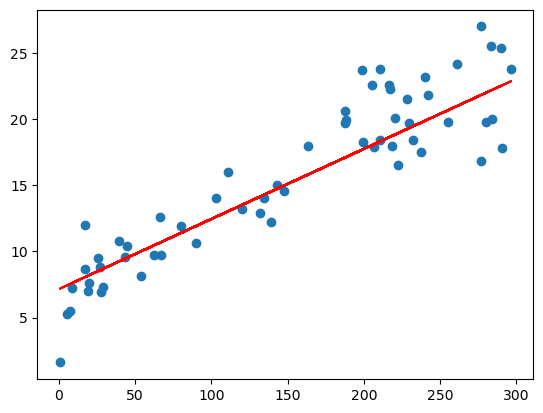

In [20]:
plt.scatter(X_test,y_test)
plt.plot(X_test,7.150+0.053*X_test,'r')
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error,r2_score
print(round(np.sqrt(mean_squared_error(y_test, y_pred)),2))

2.54


In [22]:
r_squared_value = r2_score(y_test, y_pred)
print(round(r_squared_value,2))

0.83
